#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Project 1. Unsupervised Learning on Bank Marketing Data </span>


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Introduction </span>
<div style="text-align: justify;">

In order to investigate how financial companies can accurately forecast client responses to direct marketing efforts, we are use the **Bank Marketing Dataset** for this study. This dataset includes demographic data about the target audience, past marketing campaign responses, and other characteristics specific to bank customers. Therefore, represents a relevant tool for comprehending the complex relationships between consumer preferences and behavior in the banking industry as we can get to know which are the elements that influence consumer engagement and loyalty by looking at patterns in the dataset, such as the frequency of favorable responses to particular campaign types, respondent demographic trends, and the impact of outside factors on campaign success rates.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Real World Problem </span>
<div style="text-align: justify;">

Improving the efficacy of bank marketing initiatives is the main **problem** in this situation. One-size-fits-all tactics are frequently used in traditional marketing techniques, which can lead to low conversion rates and wasteful resource usage. The objective is to find more sophisticated, data-driven approaches that can more effectively target the right clients with the correct offers, raising the probability of favorable reactions and enhancing campaign effectiveness overall.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Role of Unsupervised Learning </span>
<div style="text-align: justify;">

- **Principal Component Analysis (PCA)**: this technique minimizes the dimensionality of the dataset while preserving the majority of its variance. As a result, the dataset is more straightforward to examine and visualize. It can improve the performance of clustering by focusing on the most informative features, thus providing more meaningful customer segments. For instance, we could identify the most relevant features that influence customer responses to marketing campaigns.

- **Cluster Analysis**: based on shared characteristics, including account information, demographics, and past campaign responses, this technique can divide the bank's customer base into discrete clusters. The bank might potentially increase the campaign's success rate by customizing its marketing techniques to each group's unique demands and preferences by identifying these groups.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Objectives </span>
<div style="text-align: justify;">

Using unsupervised learning techniques to find hidden patterns and client segmentation in the bank marketing data is the main **goal** of this investigation. The bank may optimize resource allocation and boost conversion rates by creating tailored marketing campaigns that are more likely to resonate with each customer segment by knowing the traits that set them apart.

</div>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Exploratory Data Analysis </span>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variables </span>
<div style="text-align: justify;">

*Description provided by UC Irvine, Machine Learning Respository*

**Main:**
* `age` (numeric)

* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* `default`: has credit in default? (categorical: 'no','yes','unknown')

* `housing`: has housing loan? (categorical: 'no','yes','unknown')

* `loan`: has personal loan? (categorical: 'no','yes','unknown')


**Related with the last contact of the current campaign:**

* `contact`: contact communication type (categorical: 'cellular','telephone')

* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

* `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* `previous`: number of contacts performed before this campaign and for this client (numeric)

* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes:**

* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

* `cons.price.idx`: consumer price index - monthly indicator (numeric)

* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

* `euribor3m`: euribor 3 month rate - daily indicator (numeric)

* `nr.employed`: number of employees - quarterly indicator (numeric)

* `subscribed`: has the client subscribed a term deposit? (binary: 'yes','no')

</div>


In [220]:
import os
import pandas as pd
import numpy as np

In [221]:
df = pd.read_csv("./bank_marketing_dataset.csv")

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [223]:
# Check number of rows in dataset
df.shape

(41188, 21)

In [224]:
# Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [225]:
# List of columns where 'unknown' values should lead to row removal
check = ['education', 'default', 'housing', 'loan', 'job', 'marital']

# Replace 'unknown' with NaN across the specified columns
df.replace({'unknown': np.nan}, inplace = True)

# Drop rows with NaN in any of the specified columns
df.dropna(subset = check, inplace = True)

In [226]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
nr.employed,30488.0,5160.813409,75.158065,4963.600,5099.100,5191.000,5228.100,5228.100


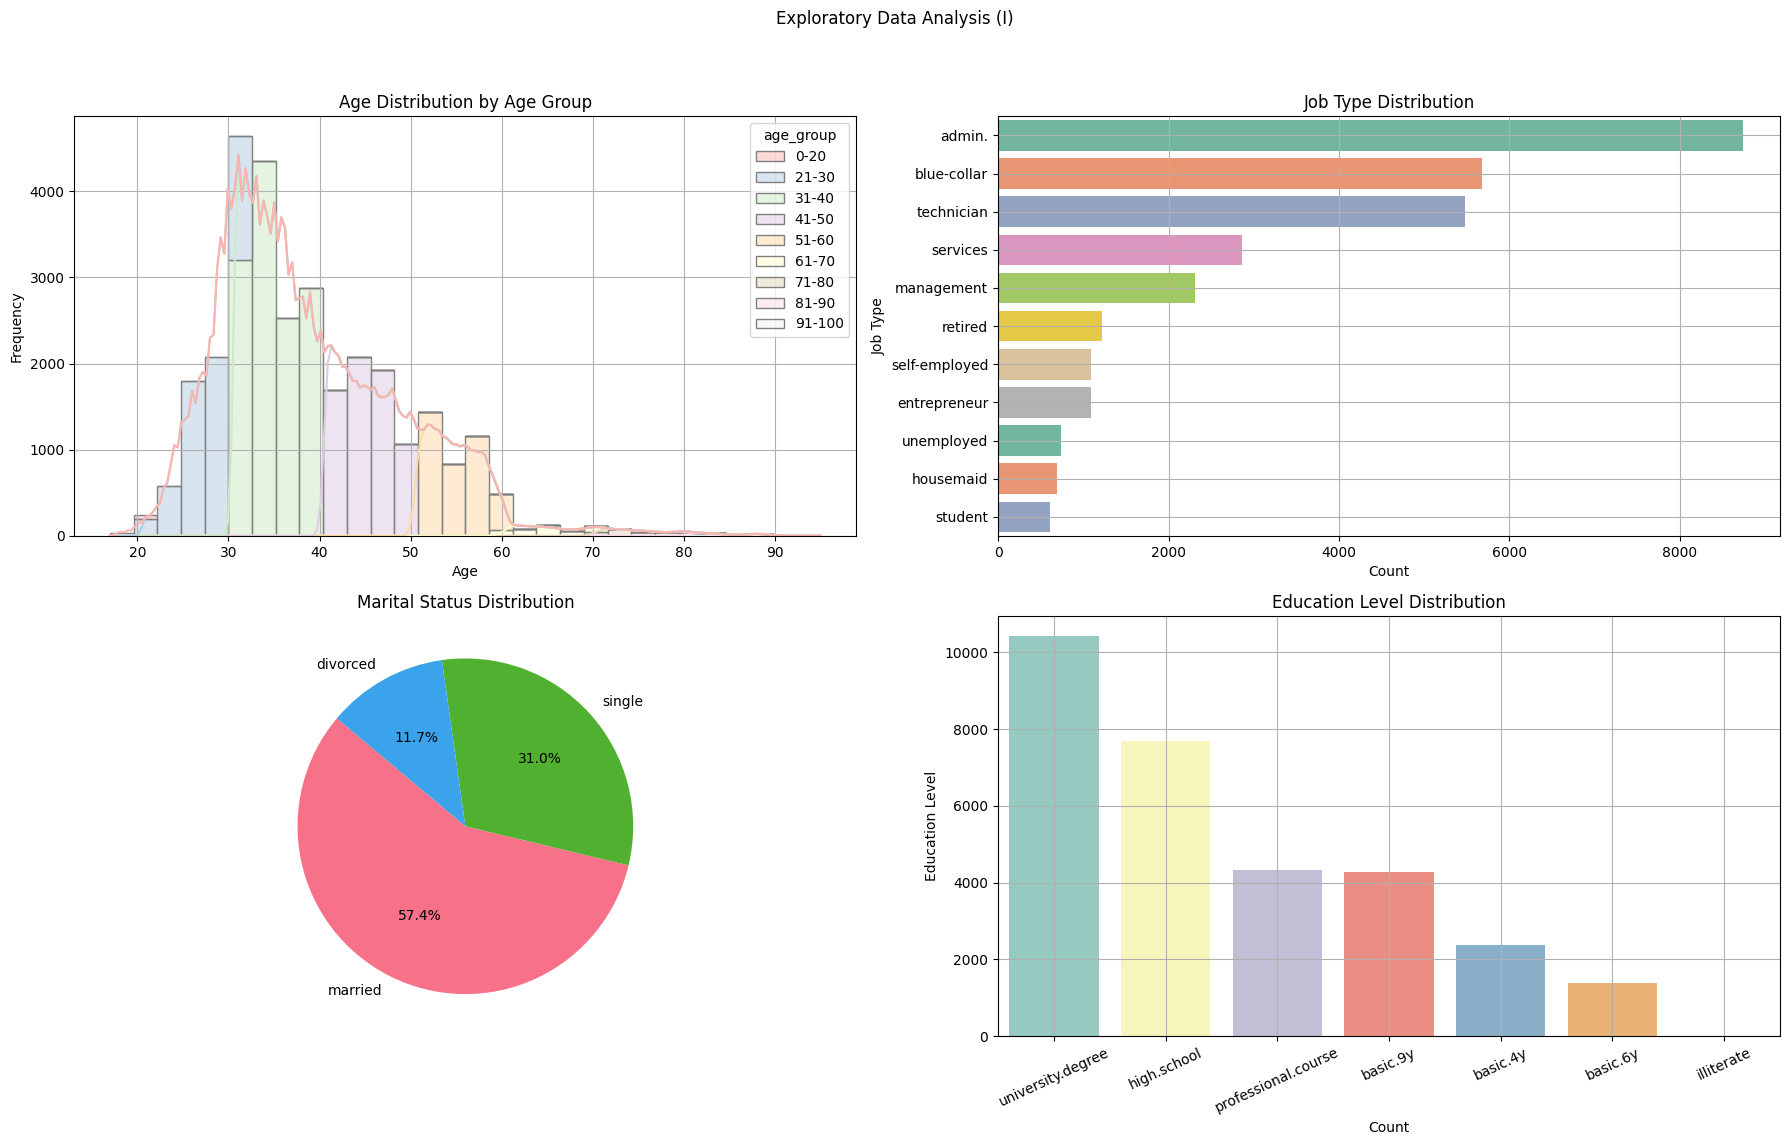

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
sns.histplot(data=df, x = 'age', hue = 'age_group', multiple = 'stack', palette = 'Pastel1', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Job Type Distribution
job_types = df['job'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, job in enumerate(job_types):
    sns.barplot(x=[df[df['job'] == job]['job'].count()], y = [job], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Job Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job Type')
axes[0, 1].grid(True)

# Marital Status Distribution
marital_counts = df['marital'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("husl", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'education', data = df, order = df['education'].value_counts().index, ax = axes[1, 1], palette = 'Set3')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', rotation = 25, labelsize = 'medium')
axes[1, 1].grid(True)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()


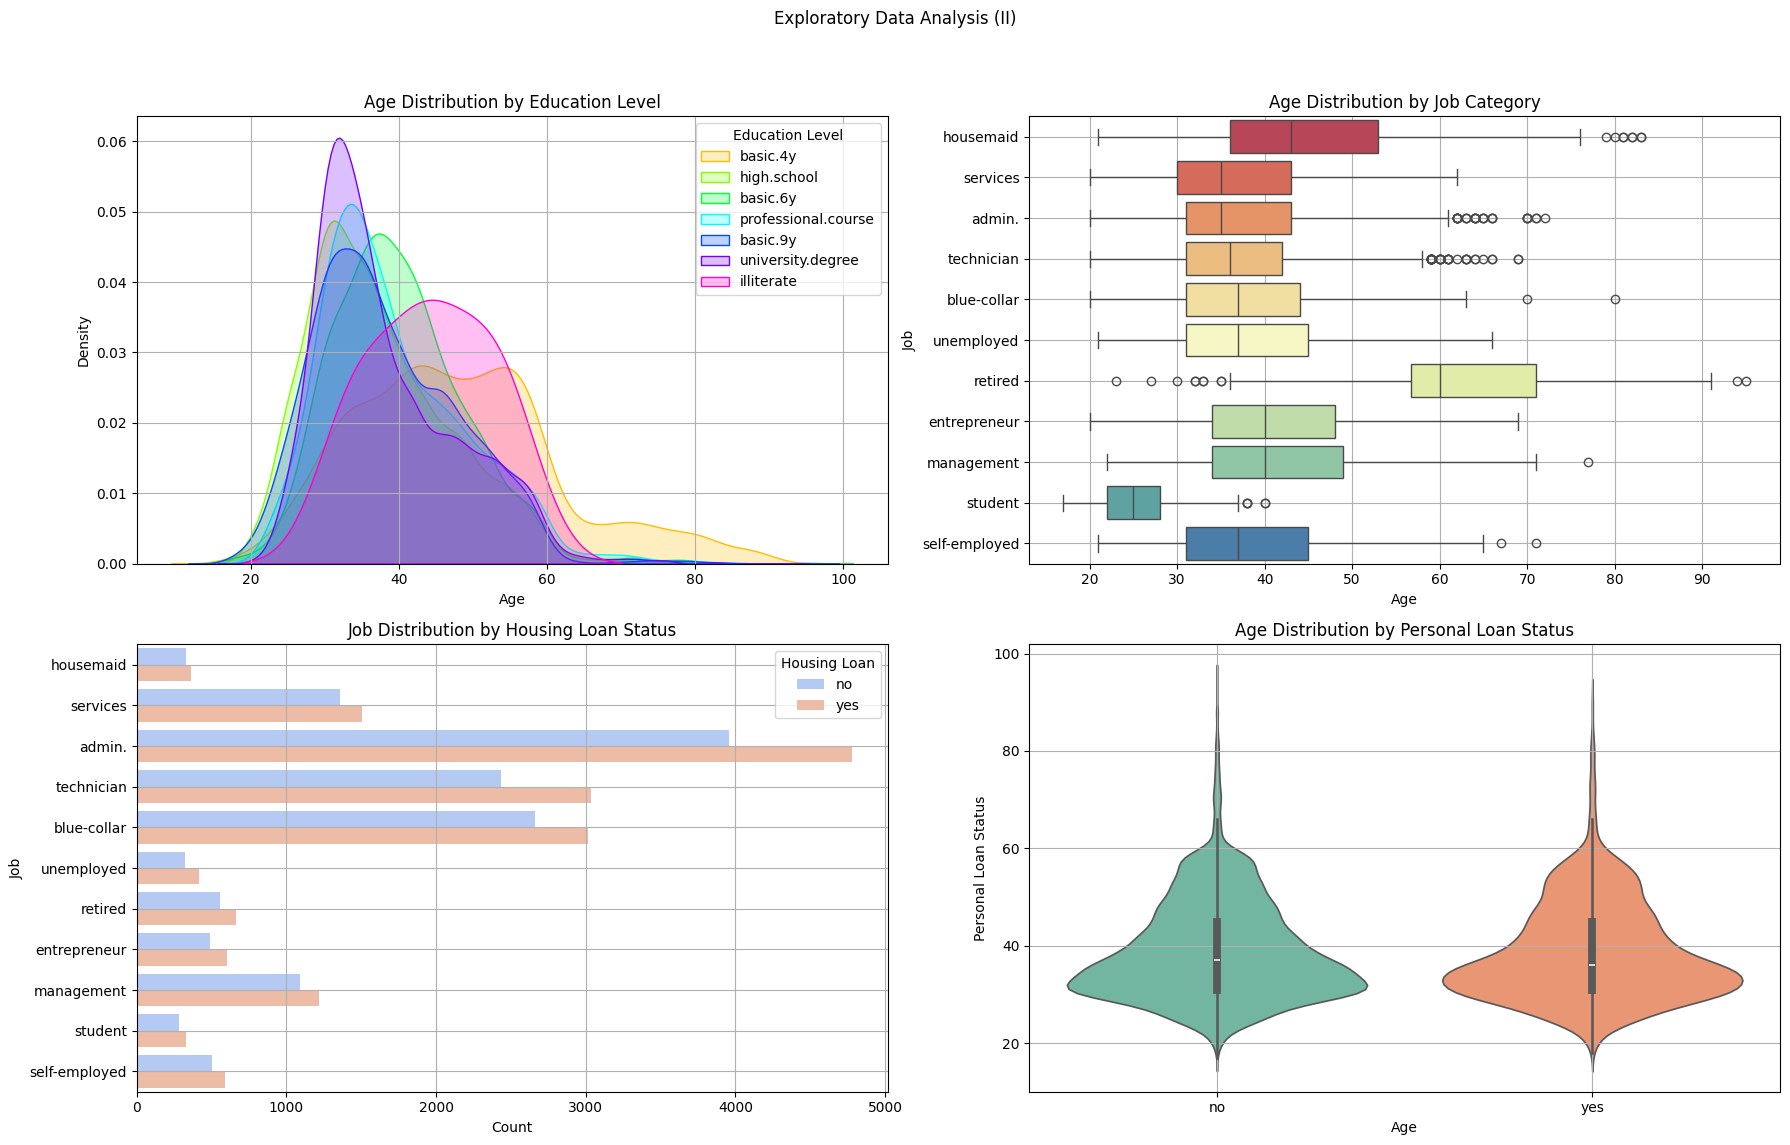

In [228]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 12))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['education'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['education'] == level]['age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True)

# Age and Job Distribution
sns.boxplot(x = 'age', y = 'job', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Job Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Job')
axes[0, 1].grid(True)

# Job and Housing Loan Distribution
sns.countplot(y = 'job', hue = 'housing', data = df, ax = axes[1, 0], palette = 'coolwarm')
axes[1, 0].set_title('Job Distribution by Housing Loan Status')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Job')
axes[1, 0].legend(title = 'Housing Loan')
axes[1, 0].grid(True)

# Age and Personal Loan Distribution
sns.violinplot(x = 'loan', y = 'age', data = df, palette = 'Set2')
axes[1, 1].set_title('Age Distribution by Personal Loan Status')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Personal Loan Status')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


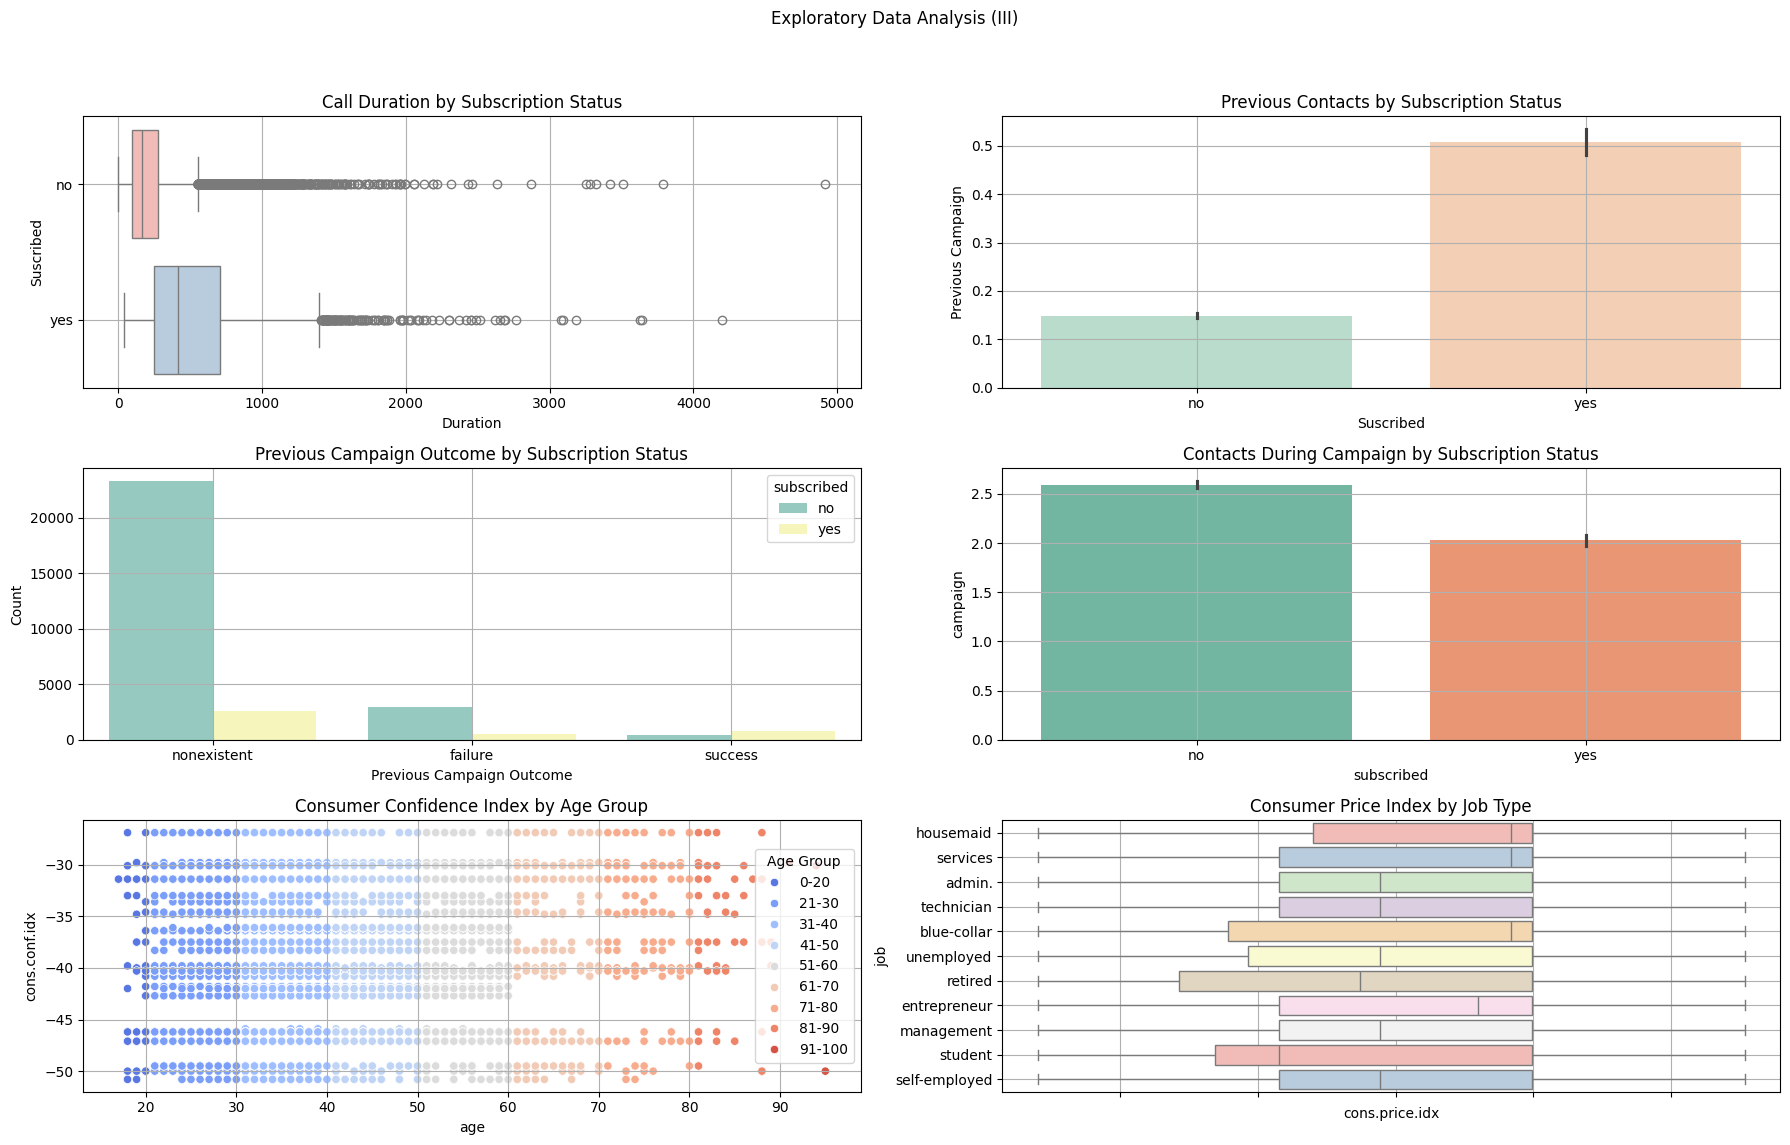

In [229]:
# Setting up the subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 12))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (III)')

# Duration and Subscribed
sns.boxplot(x = 'duration', y = 'subscribed', data = df, ax = axes[0, 0], palette = 'Pastel1')
axes[0, 0].set_title('Call Duration by Subscription Status')
axes[0, 0].grid(True)
axes[0, 0].set_xlabel('Duration')
axes[0, 0].set_ylabel('Suscribed')

# Previous and Subscribed
sns.barplot(x = 'subscribed', y = 'previous', data = df, ax = axes[0, 1], palette = 'Pastel2')
axes[0, 1].set_title('Previous Contacts by Subscription Status')
axes[0, 1].grid(True)
axes[0, 1].set_xlabel('Suscribed')
axes[0, 1].set_ylabel('Previous Campaign')

# Poutcome and Subscribed
sns.countplot(x = 'poutcome', hue = 'subscribed', data = df, ax = axes[1, 0], palette = 'Set3')
axes[1, 0].set_title('Previous Campaign Outcome by Subscription Status')
axes[1, 0].grid(True)
axes[1, 0].set_xlabel('Previous Campaign Outcome')
axes[1, 0].set_ylabel('Count')

# Campaign and Subscribed
sns.barplot(x = 'subscribed', y = 'campaign', data = df, ax = axes[1, 1], palette = 'Set2')
axes[1, 1].set_title('Contacts During Campaign by Subscription Status')
axes[1, 1].grid(True)

# Consumer Confidence Index and Age with Age Groups as hue
sns.scatterplot(x = 'age', y = 'cons.conf.idx', hue = 'age_group', data = df, ax = axes[2, 0], palette = 'coolwarm')
axes[2, 0].set_title('Consumer Confidence Index by Age Group')
axes[2, 0].legend(title='Age Group')
axes[2, 0].grid(True)

# Consumer Price Index and Job
sns.boxplot(x='cons.price.idx', y='job', data=df, ax=axes[2, 1], palette='Pastel1')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45)
axes[2, 1].set_title('Consumer Price Index by Job Type')
axes[2, 1].grid(True)

# Show the plot
plt.tight_layout(rect = [0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

Explain HERE

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Feature Engineering Possibilities </span>
<div style="text-align: justify;">

Explain that `age_group` has been created in the dataset

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Transformations </span>
<div style="text-align: justify;">

Binary Indicators: Creating binary variables for certain attributes, such as having a personal loan or not, can make it easier for some machine learning algorithms to process the data.

Ordinal Encoding: For categorical variables with a clear order (like 'education'), you could apply ordinal encoding instead of one-hot encoding to preserve the order information.

Explain that pca requires numeric variables so one-hot

</div>



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Principal Component Analysis (PCA) </span>

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30488 non-null  int64   
 1   job             30488 non-null  object  
 2   marital         30488 non-null  object  
 3   education       30488 non-null  object  
 4   default         30488 non-null  object  
 5   housing         30488 non-null  object  
 6   loan            30488 non-null  object  
 7   contact         30488 non-null  object  
 8   month           30488 non-null  object  
 9   day_of_week     30488 non-null  object  
 10  duration        30488 non-null  int64   
 11  campaign        30488 non-null  int64   
 12  pdays           30488 non-null  int64   
 13  previous        30488 non-null  int64   
 14  poutcome        30488 non-null  object  
 15  emp.var.rate    30488 non-null  float64 
 16  cons.price.idx  30488 non-null  float64 
 17  cons.conf.id

In [231]:
# Exclude duration for realistic predictive analysis as stated in the variable description
# Exclude suscribed as it is the target variable
exclude = ['duration','subscribed']

# Create a new DataFrame without the excluded columns
dfX = df.drop(columns = exclude)
dfY = df[['subscribed']]

dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30488 non-null  int64   
 1   job             30488 non-null  object  
 2   marital         30488 non-null  object  
 3   education       30488 non-null  object  
 4   default         30488 non-null  object  
 5   housing         30488 non-null  object  
 6   loan            30488 non-null  object  
 7   contact         30488 non-null  object  
 8   month           30488 non-null  object  
 9   day_of_week     30488 non-null  object  
 10  campaign        30488 non-null  int64   
 11  pdays           30488 non-null  int64   
 12  previous        30488 non-null  int64   
 13  poutcome        30488 non-null  object  
 14  emp.var.rate    30488 non-null  float64 
 15  cons.price.idx  30488 non-null  float64 
 16  cons.conf.idx   30488 non-null  float64 
 17  euribor3m   

In [232]:
dfX.shape

(30488, 20)

In [233]:
dfY.shape

(30488, 1)

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Encoding </span>
<div style="text-align: justify;">

In order to apply PCA successfully, all features must be in numeric format. EXPLAIN ORDINAL, BINARY AND ONE HOT FOR THE REST

</div>

In [234]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Define which columns are to be encoded using which method
ordinal_cols = ['education']
binary_cols = ['default', 'housing', 'loan', 'subscribed']
nominal_cols = ['age_group', 'job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply ordinal encoding
education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'] 
ordinal_encoder = OrdinalEncoder(categories=[education_order])
dfX['education'] = ordinal_encoder.fit_transform(dfX[['education']])

# Apply binary encoding using LabelEncoder
label_encoder = LabelEncoder()
for col in binary_cols:
    if col == 'subscribed':
        dfY[col] = label_encoder.fit_transform(dfY[col])
    else:
        dfX[col] = label_encoder.fit_transform(dfX[col])

# Apply one-hot encoding without the 'sparse' argument
one_hot_encoder = OneHotEncoder(drop='first')  # No 'sparse' argument here
nominal_encoded = one_hot_encoder.fit_transform(dfX[nominal_cols]).toarray()  # Convert to dense array format with .toarray()
column_names = one_hot_encoder.get_feature_names_out(nominal_cols)  # Get the column names for the one-hot encoded features
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=column_names, index=dfX.index)  # Create a DataFrame

# Concatenate the original DataFrame with the one-hot encoded DataFrame
dfX = pd.concat([dfX, nominal_encoded_df], axis=1)
original_columns = ['job', 'marital', 'contact', 'month','day_of_week', 'poutcome','age_group']

# Drop these columns after encoding
dfX = dfX.drop(columns=original_columns)

In [235]:
dfX

,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,2.0,0,0,0,1,999,0,1.1,93.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,5.0,0,1,0,1,999,0,1.1,93.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,3.0,0,0,0,1,999,0,1.1,93.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,5.0,0,0,1,1,999,0,1.1,93.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,59,6.0,0,0,0,1,999,0,1.1,93.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6.0,0,1,0,1,999,0,-1.1,94.767,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46,6.0,0,0,0,1,999,0,-1.1,94.767,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56,7.0,0,1,0,2,999,0,-1.1,94.767,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,44,6.0,0,0,0,1,999,0,-1.1,94.767,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


$$Rank(X):$$

<div style="font-family: Latin Modern Roman; font-size: 19px; font-style: italic; text-align: center;">
Number of dimensions that can be eliminated from X without performing PCA
</div>

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.linalg import svdvals

X_std = StandardScaler().fit_transform(dfX)
singular_values = svdvals(np.cov(X_std.T))
X_rank = np.sum(singular_values > 1e-10)
X_rank


49

In this case, no variables can be eliminated before performing PCA

In [237]:
L_linspace = np.linspace(1, X_rank, 10, dtype=int)

L_linspace

array([ 1,  6, 11, 17, 22, 27, 33, 38, 43, 49])

In [238]:
RMSE = []

for index, L in enumerate(L_linspace):
    pca = PCA(n_components=L)
    X_transformed = pca.fit_transform(X_std)
    X_proj = pca.inverse_transform(X_transformed)
    RMSE.append(mean_squared_error(X_std, X_proj, squared=False))

In [239]:
pca.components_.shape

(49, 49)

In [240]:
eigenvalues = pca.explained_variance_
eigenvalues

array([5.18611229e+00, 3.09448724e+00, 2.24570957e+00, 2.16519625e+00,
       1.84215758e+00, 1.68334707e+00, 1.48183012e+00, 1.46425672e+00,
       1.29536136e+00, 1.26253837e+00, 1.25490835e+00, 1.21013421e+00,
       1.18346530e+00, 1.15397985e+00, 1.12985195e+00, 1.07887820e+00,
       1.06105434e+00, 1.05571234e+00, 1.04990105e+00, 1.04390967e+00,
       1.03876163e+00, 1.02754112e+00, 1.01243276e+00, 1.00337996e+00,
       9.91332328e-01, 9.83155530e-01, 9.80046065e-01, 9.71812390e-01,
       9.54856849e-01, 9.35298631e-01, 9.11557378e-01, 8.70517517e-01,
       8.45349431e-01, 7.59570578e-01, 5.27825211e-01, 4.31081477e-01,
       3.86398575e-01, 2.63932389e-01, 2.42616630e-01, 2.34077449e-01,
       2.17212955e-01, 2.04234375e-01, 1.11380699e-01, 6.22159311e-02,
       4.18388378e-02, 4.08131514e-02, 4.23046821e-03, 3.08805593e-03,
       2.25703216e-03])

<div style="text-align: justify;">

Each eigenvalue corresponds to a principal component and represents the amount of variance that is attributed to that component.
The eigenvalues are usually arranged in descending order, where the first eigenvalue accounts for the highest amount of variance in the data, followed by the second and so forth. 

The *Kaiser Rule* is a rule of thumb used for selecting the number of principal components to keep with PCA. This criterion states that only the eigenvalues greater than one should be kept, that is:

$$L = 24$$
</div>


In [241]:
variance_explained = pca.explained_variance_ratio_
variance_explained

array([1.05835555e-01, 6.31507295e-02, 4.58293044e-02, 4.41862292e-02,
       3.75938196e-02, 3.43528950e-02, 3.02404392e-02, 2.98818101e-02,
       2.64350791e-02, 2.57652440e-02, 2.56095345e-02, 2.46958065e-02,
       2.41515608e-02, 2.35498367e-02, 2.30574467e-02, 2.20172003e-02,
       2.16534599e-02, 2.15444432e-02, 2.14258492e-02, 2.13035803e-02,
       2.11985216e-02, 2.09695391e-02, 2.06612154e-02, 2.04764703e-02,
       2.02306084e-02, 2.00637405e-02, 2.00002841e-02, 1.98322554e-02,
       1.94862353e-02, 1.90871011e-02, 1.86026016e-02, 1.77650809e-02,
       1.72514634e-02, 1.55009319e-02, 1.07715898e-02, 8.79729260e-03,
       7.88542655e-03, 5.38619861e-03, 4.95119740e-03, 4.77693410e-03,
       4.43277205e-03, 4.16791176e-03, 2.27300092e-03, 1.26967123e-03,
       8.53825826e-04, 8.32894137e-04, 8.63332540e-05, 6.30194824e-05,
       4.60603700e-05])

In [242]:
cum_variance_explained = pca.explained_variance_ratio_.cumsum()
cum_variance_explained 

array([0.10583555, 0.16898628, 0.21481559, 0.25900182, 0.29659564,
       0.33094853, 0.36118897, 0.39107078, 0.41750586, 0.4432711 ,
       0.46888064, 0.49357645, 0.51772801, 0.54127784, 0.56433529,
       0.58635249, 0.60800595, 0.62955039, 0.65097624, 0.67227982,
       0.69347834, 0.71444788, 0.7351091 , 0.75558557, 0.77581618,
       0.79587992, 0.8158802 , 0.83571246, 0.85519869, 0.87428579,
       0.8928884 , 0.91065348, 0.92790494, 0.94340587, 0.95417746,
       0.96297475, 0.97086018, 0.97624638, 0.98119758, 0.98597451,
       0.99040728, 0.99457519, 0.9968482 , 0.99811787, 0.99897169,
       0.99980459, 0.99989092, 0.99995394, 1.        ])

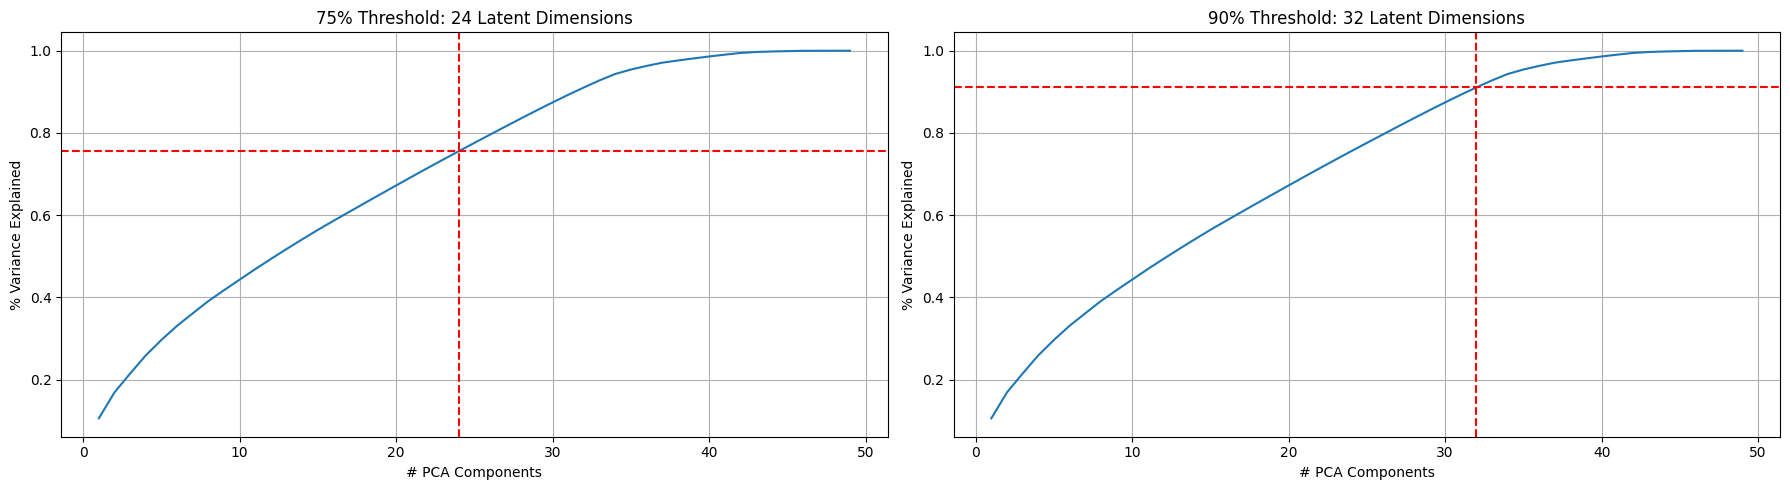

In [243]:
# Find the number of components for 75% threshold
idx_75 = np.where(cum_variance_explained > 0.75)[0][0]

# Find the number of components for 90% threshold
idx_90 = np.where(cum_variance_explained > 0.9)[0][0]

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# First subplot for 75% threshold
sns.lineplot(x = range(1, len(cum_variance_explained) + 1), y = cum_variance_explained, ax=ax[0])
ax[0].axvline(idx_75 + 1, c='r', linestyle='--')  # Add +1 because idx_75 is zero-indexed
ax[0].axhline(cum_variance_explained[idx_75], c='r', linestyle='--')
ax[0].set_xlabel('# PCA Components')
ax[0].set_ylabel('% Variance Explained')
ax[0].set_title('75% Threshold: ' + str(idx_75 + 1) + ' Latent Dimensions')
ax[0].grid(True)

# Second subplot for 90% threshold
sns.lineplot(x = range(1, len(cum_variance_explained) + 1), y = cum_variance_explained, ax=ax[1])
ax[1].axvline(idx_90 + 1, c='r', linestyle='--')  # Add +1 because idx_90 is zero-indexed
ax[1].axhline(cum_variance_explained[idx_90], c='r', linestyle='--')
ax[1].set_xlabel('# PCA Components')
ax[1].set_ylabel('% Variance Explained')
ax[1].set_title('90% Threshold: ' + str(idx_90 + 1) + ' Latent Dimensions')
ax[1].grid(True)

# Display the plot
plt.tight_layout()
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Trade-off: Kaisser Rule vs Explained Variance</span>
<div style="text-align: justify;">

The trade-off between these two criterions involves balacing simplicity, explicability and accuracy:

* By choosing the latent dimensions according to the *Kaiser Rule*, the model may end up more straightforward as it has fewer components. This is useful as the model is simpler and computationally less intensive to train, however, the accuracy may me reduced as a result of missing some of the variance in the data 

* Opting for the number of components that explain at least 90% of the variance leads to a model that captures the data's underlying structure. Nonetheless, the model is more complex and might be harder to interpret.
 
The decision chosen ...
</div>


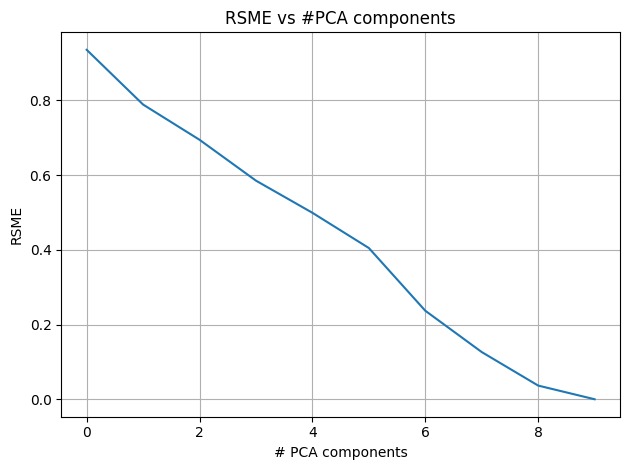

In [244]:
sns.lineplot(RMSE)
plt.xlabel('# PCA components')
plt.ylabel('RSME')
plt.grid(True)
plt.title('RSME vs #PCA components')
plt.tight_layout()
plt.show()


In [245]:
feature_names = dfX.columns

n_features = pca.n_features_in_

# Loadings: que estadísticas de los datos están recogiendo la mayor varianza (W)
loadings = pca.components_

pc_list = [f'PC{i}' for i in list(range(1, n_features))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48
feature_names,,,,,,,,,,,,,,,,,,,,,
age,0.050000,0.502367,0.013305,-0.062522,0.139329,-0.028631,0.107790,0.031859,0.030135,0.014636,...,0.033284,-0.006407,0.010967,-0.052002,-0.006739,0.027584,-0.737507,-0.068193,-0.001934,0.077025
education,0.013090,-0.154092,0.248570,-0.291595,-0.136005,0.091636,0.383700,0.066097,0.053548,0.034643,...,-0.360689,0.071891,-0.019226,0.030714,-0.002579,0.005955,0.005177,0.003892,-0.000585,0.003699
default,-0.001333,0.005003,0.009604,-0.013369,-0.015227,-0.003239,-0.010815,-0.027860,-0.000955,-0.007141,...,0.003031,0.002025,-0.000632,0.001986,0.001486,0.000091,0.000281,-0.000016,0.000057,-0.000022
housing,0.031567,-0.008591,-0.019749,-0.077305,-0.004222,-0.080768,-0.020219,0.005429,-0.032573,-0.016105,...,0.004816,0.003107,-0.008714,0.001975,-0.000612,0.002337,-0.001480,0.002478,-0.000103,-0.000175
loan,-0.000507,-0.010417,-0.010997,-0.002104,0.001698,-0.029679,0.001817,0.019567,-0.017596,-0.027954,...,-0.012666,-0.003246,0.000593,0.002095,0.000454,0.000485,-0.001582,-0.001790,0.000606,0.000122
campaign,-0.082353,0.001915,0.054670,0.038232,0.057013,-0.032946,0.021904,0.060516,-0.157441,0.050593,...,-0.011122,-0.021264,-0.022491,0.000805,-0.006611,0.012703,0.002035,-0.000333,0.003746,-0.000224
pdays,-0.253070,-0.027027,-0.366676,-0.262651,0.122808,0.078851,0.068109,0.032053,0.014164,-0.000427,...,-0.004129,-0.004918,-0.015247,-0.001743,-0.173162,-0.025480,0.066250,-0.698789,0.002958,-0.004122
previous,0.303023,0.004908,0.203534,0.202191,-0.147956,-0.122507,-0.017027,-0.000066,0.028150,-0.001893,...,-0.019078,-0.012975,-0.063543,-0.000604,0.670519,0.063100,0.014927,-0.218540,-0.003541,-0.003483
emp.var.rate,-0.388887,0.035073,0.224554,0.081256,-0.012364,-0.062018,-0.078868,-0.004264,0.019886,0.001402,...,0.011185,-0.015741,-0.070683,-0.005696,-0.036073,-0.012538,0.002710,0.004625,-0.643577,-0.022634


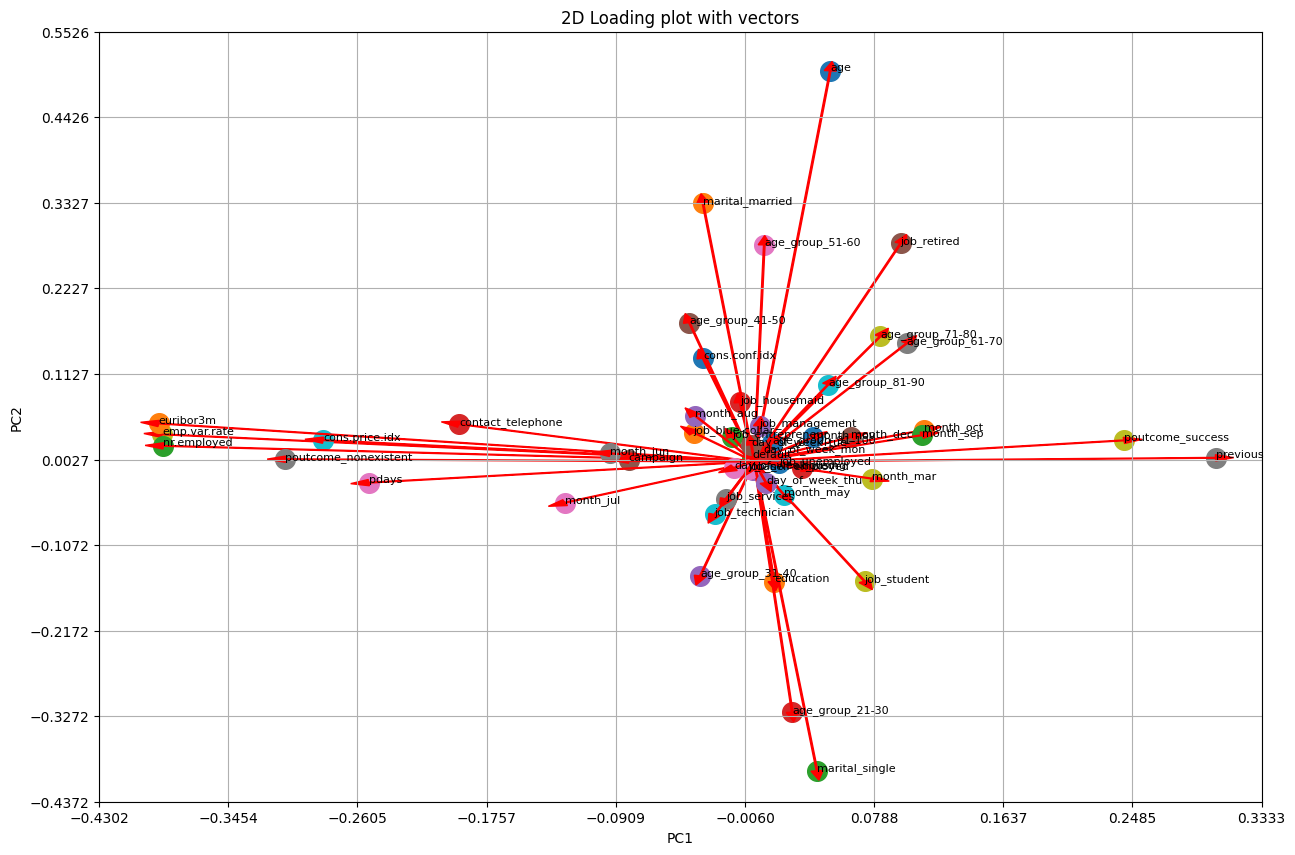

In [246]:
xs = loadings_df.iloc[:, 0]
ys = loadings_df.iloc[:, 1]
 
plt.figure(figsize = (15,10))
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs.iloc[i], ys.iloc[i], s = 200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs.iloc[i], # length of the arrow along x
        ys.iloc[i], # length of the arrow along y
        color = 'r', 
        head_width = 0.008
        )
    plt.text(xs.iloc[i], ys.iloc[i], varnames, fontsize=8)
 
# Define the axes
xmin, xmax = xs.min() * 1.1, xs.max() * 1.1
ymin, ymax = ys.min() * 1.1, ys.max() * 1.1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Set x and y ticks
xticks = np.linspace(xmin, xmax, num=10)
yticks = np.linspace(ymin, ymax, num=10)
plt.xticks(xticks)
plt.yticks(yticks)

plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot with vectors')
plt.grid(True)
plt.show()

In [247]:
sorted_components = sorted(enumerate(variance_explained), key=lambda x: x[1], reverse=True)
sorted_components

[(0, 0.10583555482334765),
 (1, 0.06315072947131022),
 (2, 0.045829304404162205),
 (3, 0.04418622917925183),
 (4, 0.03759381959794627),
 (5, 0.034352894965270823),
 (6, 0.03024043918928993),
 (7, 0.029881810131784873),
 (8, 0.02643507907555404),
 (9, 0.025765244024153738),
 (10, 0.025609534500869318),
 (11, 0.02469580651811707),
 (12, 0.024151560798593086),
 (13, 0.023549836691374677),
 (14, 0.02305744674483655),
 (15, 0.022017200307257918),
 (16, 0.021653459935732915),
 (17, 0.021544443205614657),
 (18, 0.02142584919011717),
 (19, 0.021303580298947807),
 (20, 0.021198521574520186),
 (21, 0.02096953908713126),
 (22, 0.020661215384628267),
 (23, 0.0204764703117234),
 (24, 0.02023060841159858),
 (25, 0.02006374045730401),
 (26, 0.020000284078539817),
 (27, 0.01983225539488204),
 (28, 0.01948623529959502),
 (29, 0.019087101094163013),
 (30, 0.018602601621844506),
 (31, 0.0177650809039298),
 (32, 0.017251463350626724),
 (33, 0.01550093191587372),
 (34, 0.010771589762897292),
 (35, 0.008797

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variables for Clustering </span>
<div style="text-align: justify;">

Explain HERE

PC1_loading("mean concavity") > PC1_loading("area error")

Si el angulo 90º, existe poca correlacion entre variables

Interesan variables poco correladas (igual correladas explican lo mismo)

A mayor proyección en x, mayor valor de la varianza explicada

Se escogeran las variables con mayor proyección y que estén poco correladas 

</div>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Clustering </span>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Average Link </span>

<div style="text-align: justify;">

EXPLAIN WHY THIS METHOD IS USED (IS THE PREFERRED ONE)

Average link clustering represents a compromise between single and complete link clustering. It
tends to produce relatively compact clusters that are relatively far apart. However, since it involves averaging of the $d_{i,j}$, any change to the measurement scale can change the result. In contrast, single linkage and complete linkage are invariant to monotonic transformations of $d_{i,j}$, since they leave the relative ordering the same.

</div>

In [248]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [249]:
XTR, XTS, YTR, YTS = train_test_split(dfX, dfY,
                                      test_size = 0.2,  # percentage preserved as test data
                                      random_state = 1, # seed for replication
                                      stratify = dfY)   # Preserves distribution of y

In [250]:
from scipy.spatial.distance import pdist

clustering = AgglomerativeClustering(linkage = 'average', metric = 'manhattan').fit(XTR)
cityDist = pdist(XTR, 'cityblock')

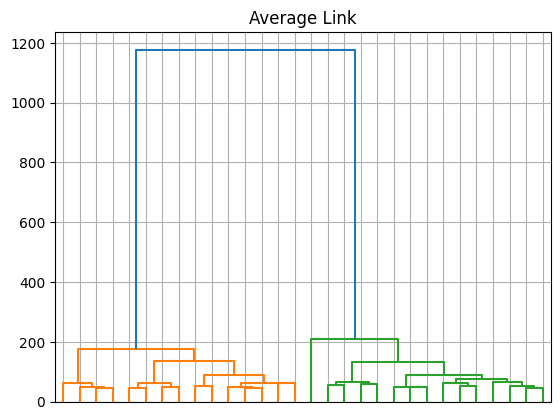

In [251]:
import scipy 

plt.figure()
Z = scipy.cluster.hierarchy.linkage(cityDist, method='average')
scipy.cluster.hierarchy.dendrogram(Z, truncate_mode='lastp')
plt.title('Average Link')
plt.tick_params(labelbottom = False)
plt.grid(True)
plt.show()

In [266]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [267]:
purity_score(YTS['subscribed'], clustering.fit_predict(XTS))

0.884388324040669

In [268]:
from sklearn.metrics.cluster import rand_score
rand_score(YTS['subscribed'], clustering.fit_predict(XTS))

0.7954752276697813

In [269]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(YTS['subscribed'], clustering.fit_predict(XTS))

0.250445061341839

In [270]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(YTS['subscribed'], clustering.fit_predict(XTS))

0.12029753737149332